In [36]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [58]:
import pandas as pd
import numpy as np
iris = pd.read_csv("iris.csv")
iris.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [79]:
#iris.info()
#iris.describe()
iris.isnull().sum()  # there is no null values

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [80]:
iris_df = pd.get_dummies(iris, drop_first=True)
iris_df
# Create a separate dataframe consisting only of the features i.e independent attributes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
iris['Class'] = iris.Class.astype('category')
iris.dtypes
X = iris.drop(labels= "Class" , axis = 1)
X = X.apply(zscore)  # convert all attributes to Z scale 


In [81]:
# Capture the class values from the 'Class' column into a pandas series akin to array 
y = iris[["Class"]]
y = pd.get_dummies(y, drop_first=True)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [135]:
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


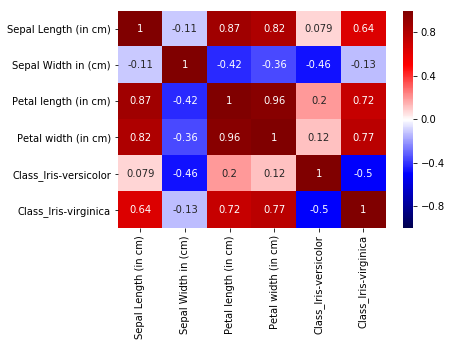

In [82]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
sns.heatmap(iris_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic') #nothing to drop

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [83]:
iris_df.var()  #nothing to drop

Sepal Length (in cm)     0.685694
Sepal Width in (cm)      0.188004
Petal length (in cm)     3.113179
Petal width (in cm)      0.582414
Class_Iris-versicolor    0.223714
Class_Iris-virginica     0.223714
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

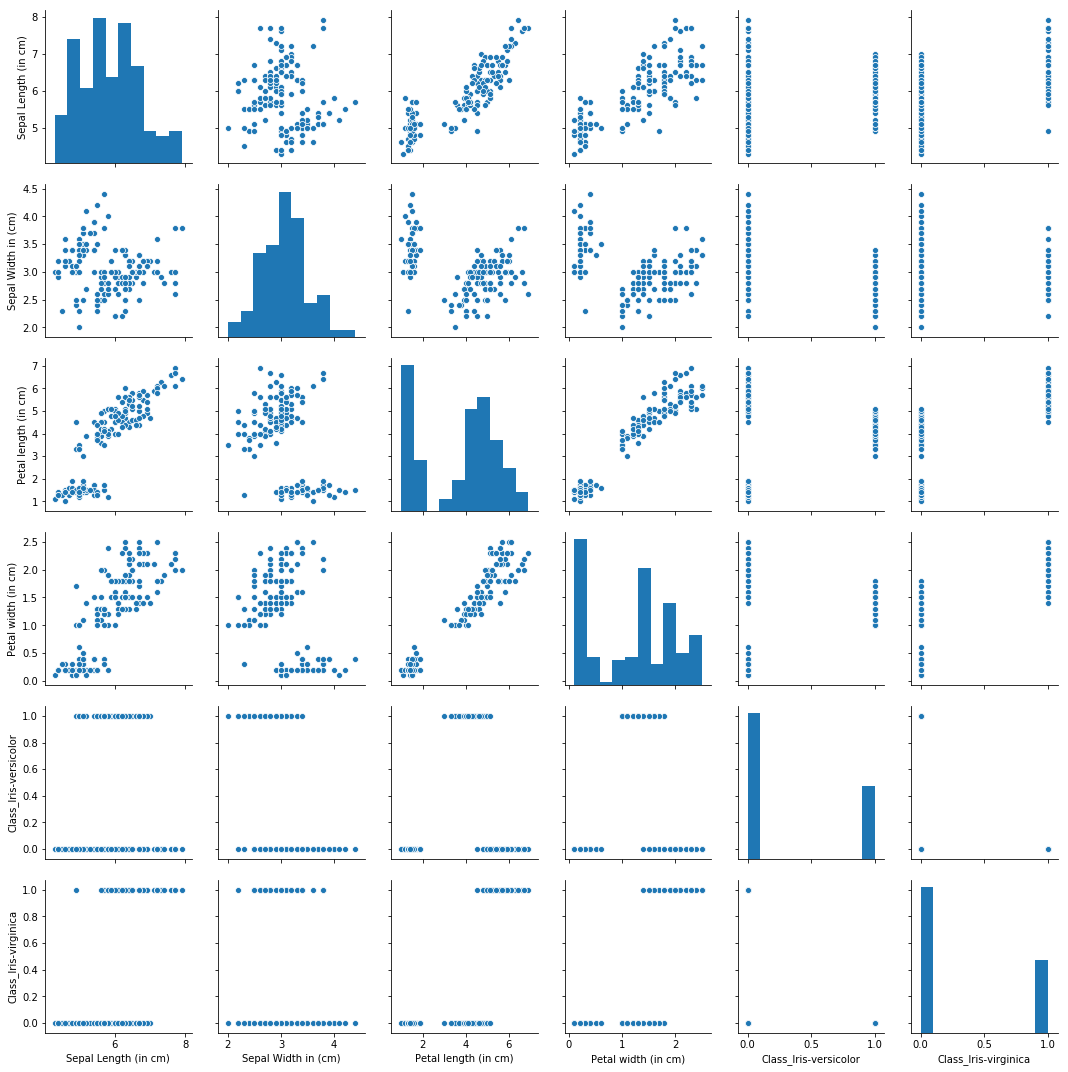

In [84]:
# Pairplot using sns
sns.pairplot(iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [94]:
test_size = 0.20 # taking 70:30 training and test set
seed = 0  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)
y_predictProb = model.predict_proba(X_test)
model.score(X_test, y_test)

0.9666666666666667

In [95]:
acc_test = accuracy_score(y_test, y_predictProb)

ValueError: Found input variables with inconsistent numbers of samples: [30, 2]

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:
k_values=[3,5,9]
for i in k_values:
    knnalgo(3,X, y, test_size = 0.2, seed = 7)

ValueError: Found input variables with inconsistent numbers of samples: [30, 2]

In [ ]:
def knnalgo(k,X, y, test_size = 0.2, seed = 2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predicted_labels = model.predict(X_test)
    y_predictProb = model.predict_proba(X_test)
    acc_test = accuracy_score(y_test, y_predictProb)
    resultsDf['accuracy_score'] = acc_test
    resultsDf

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

# Naive Bayes with Iris Data

In [181]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [182]:
iris['Class'] = iris.Class.astype('category')
iris.dtypes
X = iris.drop(labels= "Class" , axis = 1)
# Capture the class values from the 'Class' column into a pandas series akin to array 
y = iris["Class"]
#y = pd.get_dummies(y, drop_first=True)

In [183]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

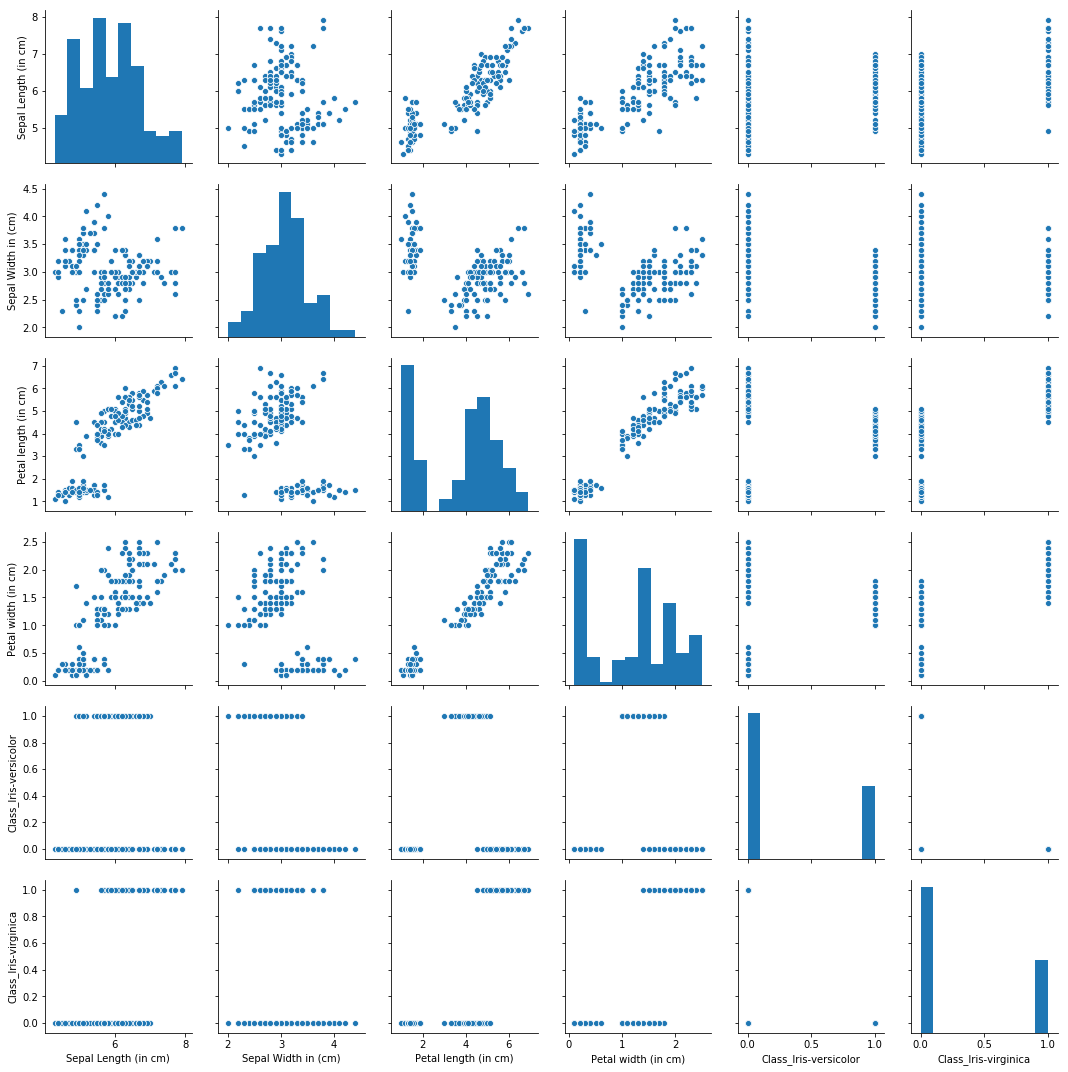

In [184]:
# Pairplot using sns
sns.pairplot(iris_df)

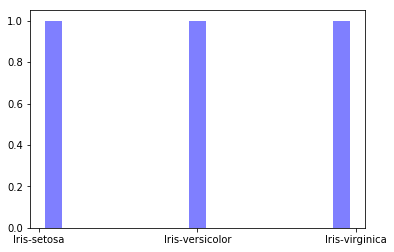

In [185]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


num_bins = 5
n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [186]:
#Drop Id variable from data


### Question 12 
Find Correlation among all variables and give your insights 

In [187]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


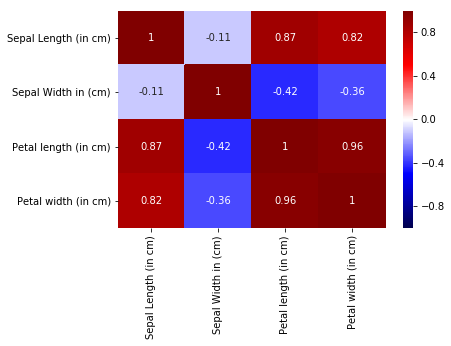

In [188]:
## Correlation Output
sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

### Split data in Training and test set in 80:20.

In [189]:
test_size = 0.20 # taking 80:20 training and test set
seed = 0  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [190]:
# Use StandardScaler or similar methods

### Question 14 
Train and Fit NaiveBayes Model

In [191]:
#Fit the model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [192]:
#Predict
predicted = mnb.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [193]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
# show Confusion Matrix
metrics.confusion_matrix(predicted, y_test)

array([[11,  0,  0],
       [ 0,  0,  0],
       [ 0, 13,  6]], dtype=int64)

In [178]:
# show accuracy
y_predictProb = mnb.predict_proba(X_test)
y_predictProb

array([[0.00621637, 0.3977256 , 0.59605803],
       [0.07143135, 0.45304162, 0.47552703],
       [0.82955678, 0.10788952, 0.0625537 ],
       [0.00864369, 0.43438955, 0.55696676],
       [0.71857628, 0.16906125, 0.11236247],
       [0.00411203, 0.39748908, 0.59839889],
       [0.73236938, 0.16112953, 0.10650109],
       [0.04264128, 0.46272563, 0.49463308],
       [0.03900045, 0.46139688, 0.49960267],
       [0.06865697, 0.45625155, 0.47509148],
       [0.01658446, 0.43775231, 0.54566323],
       [0.04907159, 0.46116619, 0.48976222],
       [0.0476266 , 0.4580004 , 0.494373  ],
       [0.0370066 , 0.45569759, 0.50729581],
       [0.03846889, 0.45425235, 0.50727876],
       [0.70670416, 0.17485542, 0.11844042],
       [0.03803734, 0.45128874, 0.51067391],
       [0.046643  , 0.44865123, 0.50470577],
       [0.64486959, 0.20692156, 0.14820885],
       [0.76577415, 0.14393178, 0.09029407],
       [0.01221043, 0.41762486, 0.57016471],
       [0.03710432, 0.4475329 , 0.51536278],
       [0.

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

ValueError: multiclass format is not supported

In [164]:
#Show precision and Recall metrics
pd.DataFrame(data=[accuracy_score(y_test, y_predictProb), 
                   recall_score(y_test, y_predictProb),
                   precision_score(y_test, y_predictProb)], 
             index=["accuracy", "recall", "precision"])

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [194]:
recall_score(y_test, y_predictProb)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [ ]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [ ]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [ ]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [ ]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 